# FoodShare-v0 Learning Curves

20
20
20
20


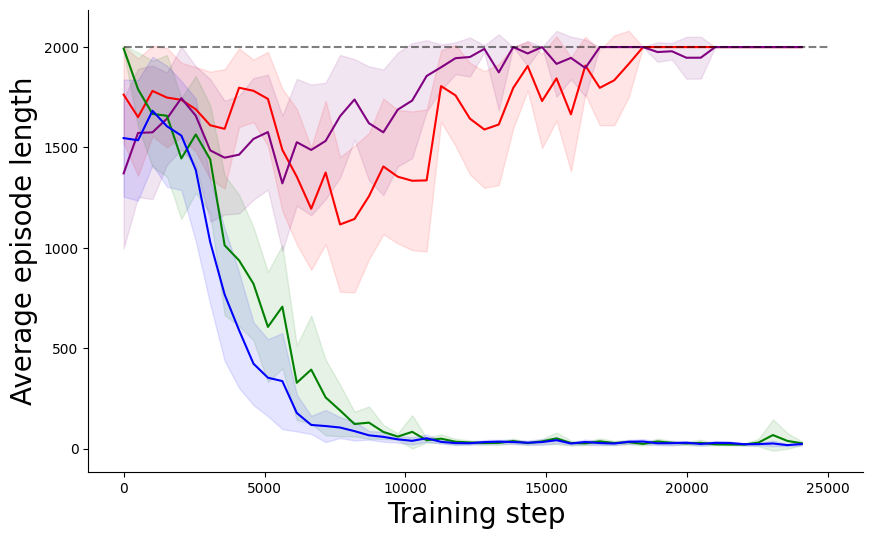

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

files = ["full", "reward", "channel", "no"]
colors = ["r", "purple", "g", "b"]

plt.figure(figsize=(10, 6))

for i, mode in enumerate(files):
    # Load the CSV file
    file_path = f'data/FoodShare-v0/{mode}_len.csv'

    data = pd.read_csv(file_path)
    #print(data)

    data_colmns = [col for col in data.columns if col.endswith('episodic_length')]
    x = data['global_step']
    #print(len(data_colmns))

    #print(data.columns)
    data_plots = []
    for col in data_colmns:
        filtered_data = data[col]
        data_plots.append(np.array(filtered_data))

    data_plots = np.array(data_plots).transpose()
    #print(data_plots.shape, x.shape)
    
    data_average = np.mean(data_plots, axis=1)
    data_std = np.std(data_plots, axis=1, ddof=1)
    n =  data_plots.shape[1]
    print(n)
    
    plt.plot(x, data_average, c=colors[i])
    top = data_average + 1.96 * data_std / np.sqrt(n)
    bottom = data_average - 1.96 *  data_std / np.sqrt(n)
    plt.fill_between(x, top, bottom, color=colors[i], alpha=0.1)

plt.plot([0, 25_000], [2_000, 2_000], c="k", alpha=0.5, linestyle="--")

# 現在の軸を取得
ax = plt.gca()

# 上と右のエッジを非表示に設定
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Training step', fontsize=20)
plt.ylabel('Average episode length', fontsize=20)
plt.savefig("foodshare_len.pdf")

plt.show()


# GridRooms-v0 Learning Curves

(625, 20) (625,)
20
(625, 20) (625,)
20
(625, 20) (625,)
20
(625, 20) (625,)
20


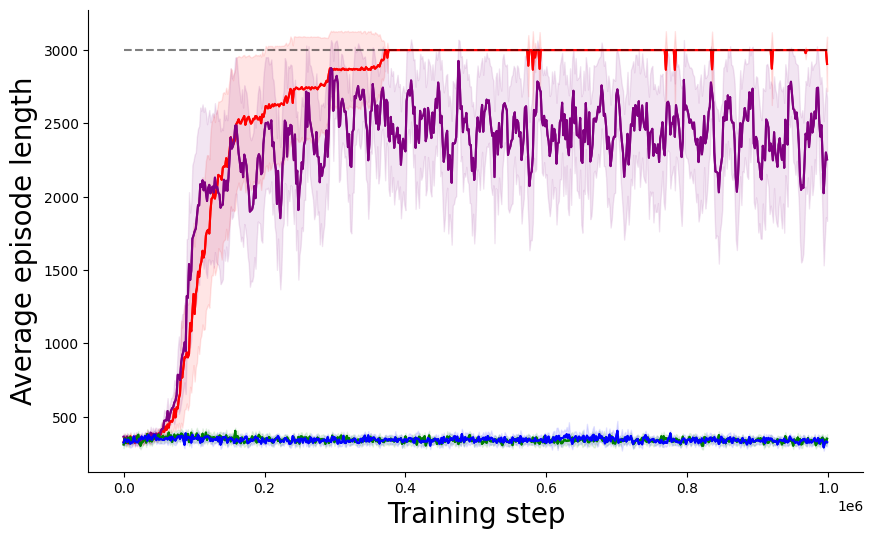

In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

files = ["full", "reward", "channel", "no"]
colors = ["r", "purple", "g", "b"]

plt.figure(figsize=(10, 6))

for i, mode in enumerate(files):
    # Load the CSV file
    file_path = f'data/GridRooms-v0/{mode}_len.csv'

    data = pd.read_csv(file_path)
    #print(data)

    data_colmns = [col for col in data.columns if col.endswith('episodic_length')]
    x = data['global_step']
    #print(len(data_colmns))

    #print(data.columns)
    data_plots = []
    for col in data_colmns:
        filtered_data = data[col]
        data_plots.append(np.array(filtered_data))

    data_plots = np.array(data_plots).transpose()
    print(data_plots.shape, x.shape)
    plt.plot(x, np.mean(data_plots, axis=1), c=colors[i])
    
    data_average = np.mean(data_plots, axis=1)
    data_std = np.std(data_plots, axis=1, ddof=1)
    n =  data_plots.shape[1]
    print(n)
    
    plt.plot(x, data_average, c=colors[i])
    top = data_average + 1.96 * data_std / np.sqrt(n)
    bottom = data_average - 1.96 *  data_std / np.sqrt(n)
    plt.fill_between(x, top, bottom, color=colors[i], alpha=0.1)

plt.plot([0, 1_000_000], [3_000, 3_000], c="k", alpha=0.5, linestyle="--")

# 現在の軸を取得
ax = plt.gca()

# 上と右のエッジを非表示に設定
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Training step', fontsize=20)
plt.ylabel('Average episode length', fontsize=20)
plt.savefig("gridrooms_len.pdf")

plt.show()


# Trap-v0 Learning Curves

(9765, 20)
20
(9765, 20)
20
(9765, 20)
20
(9765, 20)
20


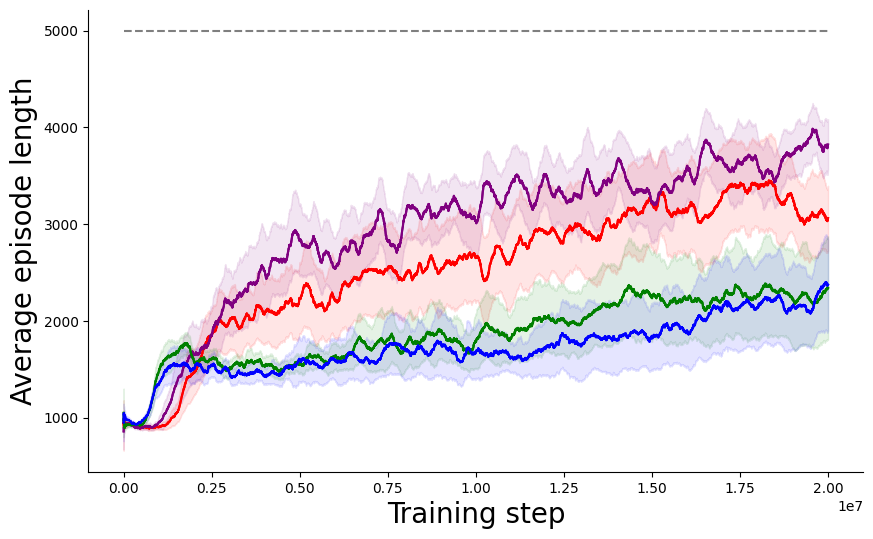

In [3]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

files = ["full", "reward", "channel", "no"]
colors = ["r", "purple", "g", "b"]

plt.figure(figsize=(10, 6))

for i, mode in enumerate(files):
    # Load the CSV file
    file_path = f'data/Trap-v0/{mode}_len.csv'

    data = pd.read_csv(file_path)
    #print(data)

    # Plotting global_step against each len/len_max column with weighted moving average
    window_size = 100  # 移動平均のウィンドウサイズ
    data_colmns = [col for col in data.columns if col.endswith('episodic_length')]
    x = data['global_step']

    #print(data.columns)
    data_plots = []
    for col in data_colmns:
        # 特定の len/len_max カラムのNaNを持つ行を削除
        filtered_data = data[col]
        # print(data)
        # 荷重移動平均を計算
        smoothed_values = filtered_data.rolling(window=window_size, min_periods=1).mean()
        data_plots.append(np.array(smoothed_values))
        #plt.plot(filtered_data['global_step'], smoothed_values, label=col, linestyle='-', alpha=0.9)
        
    data_plots = np.array(data_plots).transpose()
    print(data_plots.shape)
    plt.plot(x, np.mean(data_plots, axis=1), c=colors[i])

    data_average = np.mean(data_plots, axis=1)
    data_std = np.std(data_plots, axis=1, ddof=1)
    n =  data_plots.shape[1]
    print(n)

    plt.plot(x, data_average, c=colors[i])
    top = data_average + 1.96 * data_std / np.sqrt(n)
    bottom = data_average - 1.96 *  data_std / np.sqrt(n)
    plt.fill_between(x, top, bottom, color=colors[i], alpha=0.1)
    
plt.plot([0, 2 * 10 ** 7], [5_000, 5_000], c="k", alpha=0.5, linestyle="--")

# 現在の軸を取得
ax = plt.gca()

# 上と右のエッジを非表示に設定
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Training step', fontsize=20)
plt.ylabel('Average episode length', fontsize=20)
plt.savefig("trap_len.pdf")

plt.show()
